In [2]:
from pathlib import Path
path = Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset')

In [3]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [4]:
from fastai.vision.all import *

In [5]:
path.ls()

(#10) [Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Apple'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Bell pepper'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Cherry'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Citrus'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Corn'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Grape'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Peach'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Potato'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Strawberry'),Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Tomato')]

In [6]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Apple'

In [7]:
model_path = Path(path/plant)

In [8]:
batch_tfms=[Normalize.from_stats(*imagenet_stats)]

In [9]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid_pct=0.2,seed=1000,item_tfms=Resize(224),
                                   batch_tfms=batch_tfms,bs=128)

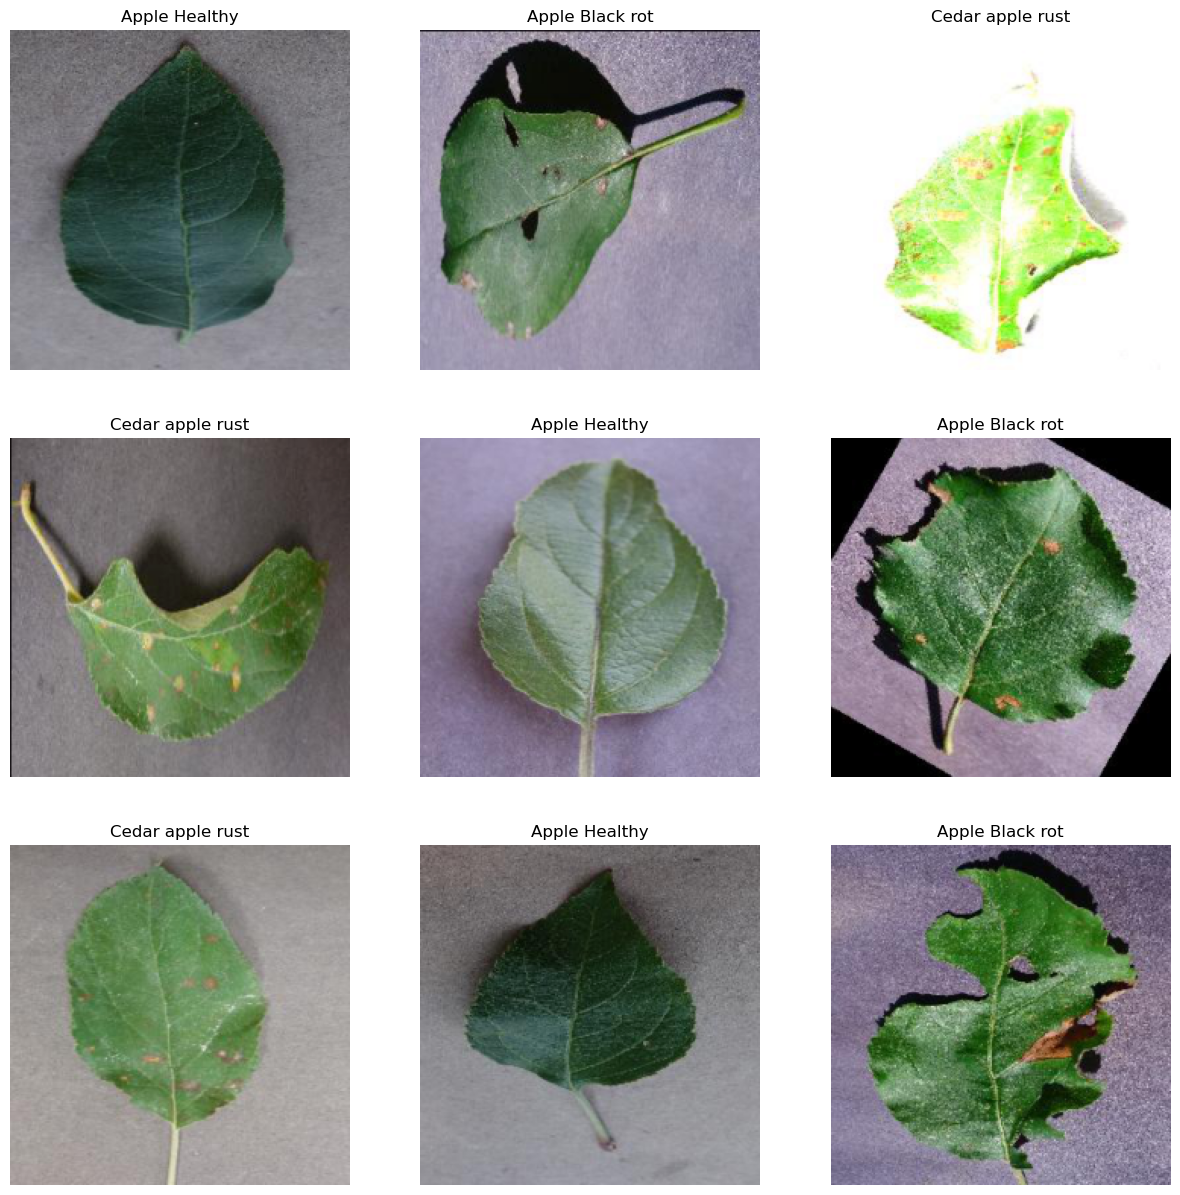

In [10]:
dls.show_batch(figsize=(15,15))

In [11]:
f1 = F1Score(average='weighted')
mcc = MatthewsCorrCoef()

In [12]:
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1,mcc],
                    cbs=[SaveModelCallback(monitor='accuracy'),EarlyStoppingCallback(monitor='accuracy',patience=2)
                         ,ShowGraphCallback()],model_dir=model_path/'models').to_fp16()

c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\fastai\callback\fp16.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\fastai\callback\fp16.py:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Better model found at epoch 0 with accuracy value: 0.9623860120773315.


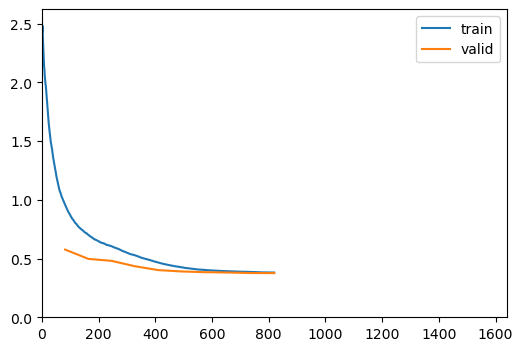

Better model found at epoch 1 with accuracy value: 0.9848024249076843.
Better model found at epoch 2 with accuracy value: 0.990121603012085.
Better model found at epoch 3 with accuracy value: 0.9920212626457214.
Better model found at epoch 5 with accuracy value: 0.9924012422561646.
Better model found at epoch 6 with accuracy value: 0.9931610822677612.
Better model found at epoch 7 with accuracy value: 0.9946808218955994.
Better model found at epoch 8 with accuracy value: 0.9950608015060425.
No improvement since epoch 8: early stopping


c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\fastai\learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch

In [13]:
learn.fit_one_cycle(20)

In [14]:
learn.save(model_path/f'models/{plant}')

Path('C:/Users/Hanish Rajavel/Desktop/MAD/PlantDiseasesDataset/Apple/models/Apple.pth')

In [15]:
learn = cnn_learner(dls, models.resnet50).load(model_path/f'models/{plant}')

c:\Users\Hanish Rajavel\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [16]:
learn.summary()

Sequential (Input shape: 128 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                       

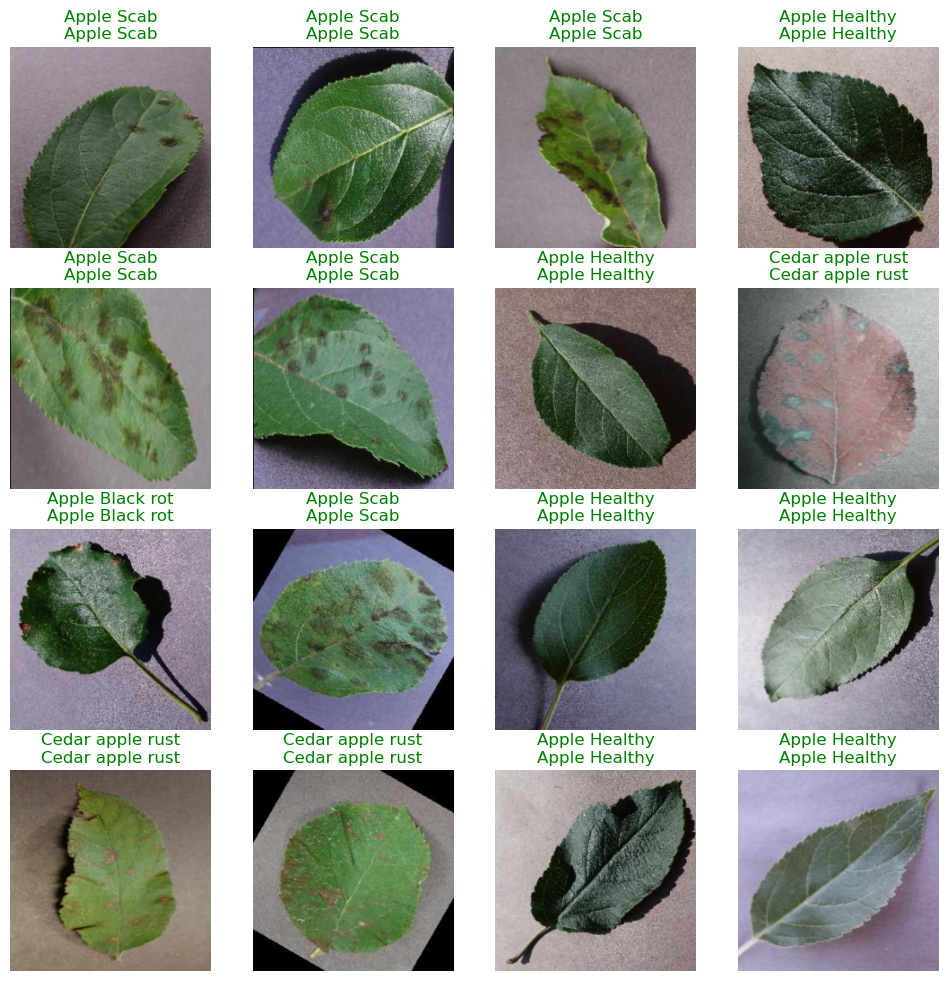

In [17]:
learn.show_results(max_n=16)

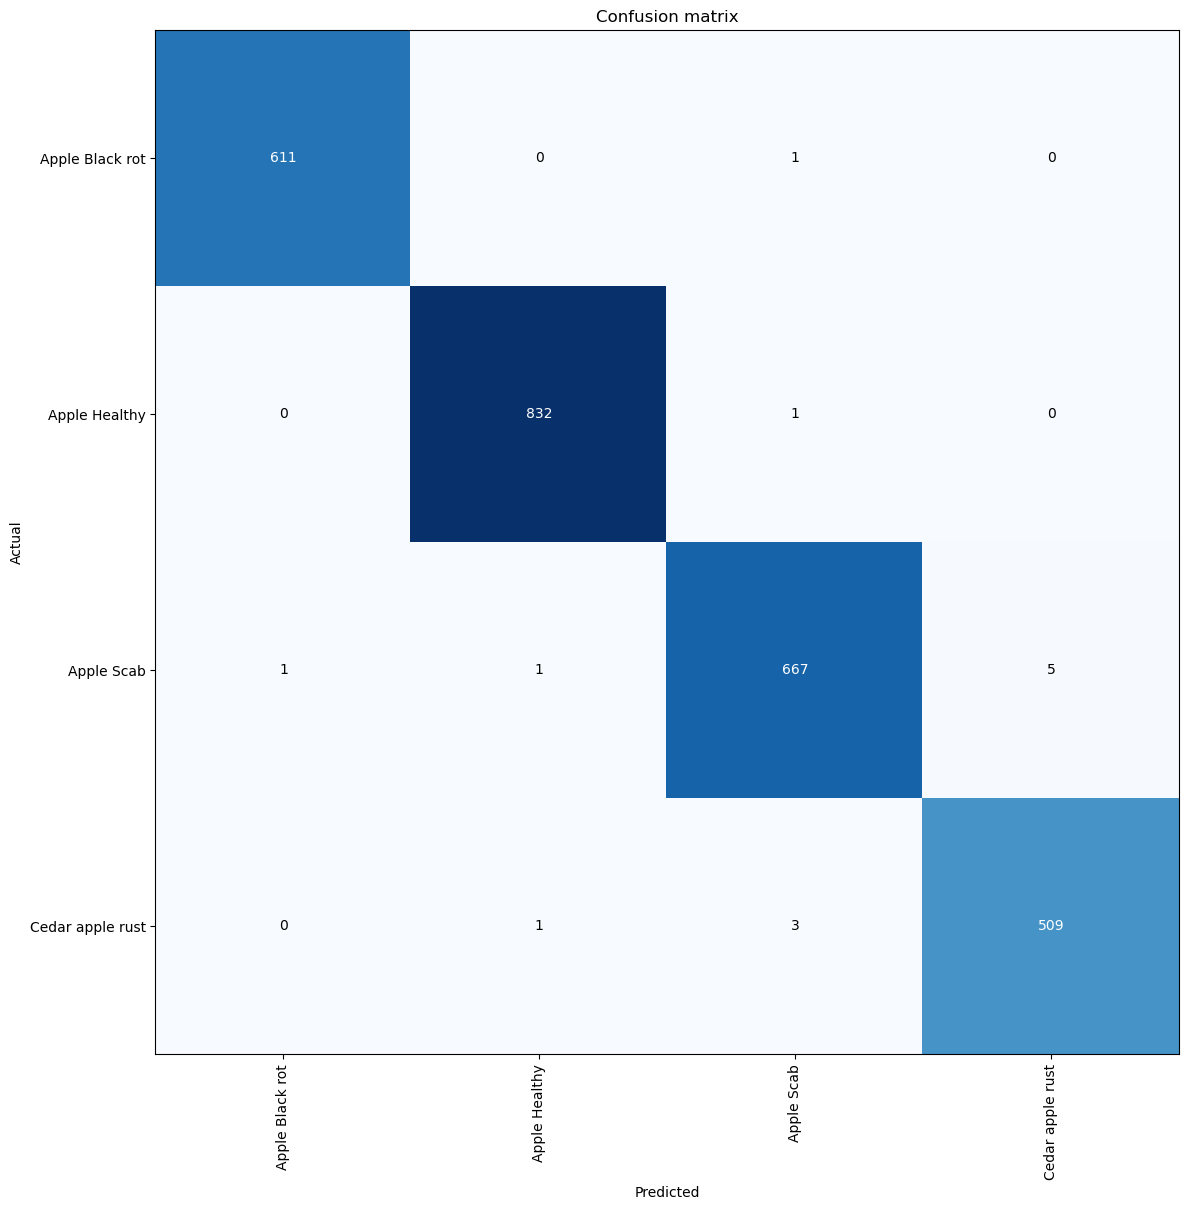

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12))

In [19]:
learn.export(f'{plant}.pkl')